<a href="https://colab.research.google.com/github/MathewBiddle/sandbox/blob/main/notebooks/create_MBON_polygons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import subprocess
import sys

COLAB = "google.colab" in sys.modules


def _install(package):
    if COLAB:
        ans = input(f"Install { package }? [y/n]:")
        if ans.lower() in ["y", "yes"]:
            subprocess.check_call(
                [sys.executable, "-m", "pip", "install", "--quiet", package]
            )
            print(f"{ package } installed!")


def _colab_install_missing_deps(deps):
    import importlib

    for dep in deps:
        if importlib.util.find_spec(dep) is None:
            if dep == "iris":
                dep = "scitools-iris"
            _install(dep)


deps = ["geoplot", "pyobis"]
_colab_install_missing_deps(deps)


Install geoplot? [y/n]:y
geoplot installed!
Install pyobis? [y/n]:y
pyobis installed!


In [ ]:
import pyobis

pyobis.__version__

'1.4.0'

In [ ]:
import pandas as pd

pd.set_option("max_colwidth", 400)

url = "https://api.obis.org/v3/institute"

institutes = pd.read_json(url)

df_inst = pd.DataFrame.from_records(institutes["results"])

df_inst.dropna(inplace=True)

df_inst["id"] = df_inst["id"].astype(int)

institution = df_inst.loc[
    df_inst["name"].str.contains(
        "United States Marine Biodiversity Observation", na=False
    )
]

institution

,id,name,country,records
58,23070,United States Marine Biodiversity Observation Network,United States of America,1615899


## Use pyobis

https://github.com/iobis/pyobis


In [ ]:
institution_id = institution["id"].tolist()[0]

institution_id

23070

In [ ]:
import pyobis

query = pyobis.dataset.search(instituteid=institution_id)

df = pd.DataFrame(query.execute())

df_meta = pd.DataFrame.from_records(df["results"])

# create a column for the human readable short name of the datasets
df_meta["short_name"] = df_meta["url"].str.split("=", expand=True)[1]

# create another column to group datasets by, which removes the year from the short names
df_meta["short_name_group"] = df_meta["short_name"].replace("\d", "", regex=True)

df_meta

,id,url,archive,published,created,updated,core,extensions,statistics,extent,...,intellectualrights,feed,institutes,contacts,nodes,keywords,downloads,records,short_name,short_name_group
0,cfceb150-bbe2-4efb-8682-14cfc7167e7c,https://ipt-obis.gbif.us/resource?r=rcca_transects,https://www1.usgs.gov/obis-usa/ipt/archive.do?r=rcca_transects,2023-01-18T20:38:20.000Z,2020-12-08T01:07:21.790Z,2023-06-03T12:51:53.436Z,event,"[measurementorfact, occurrence]","{'Event': 19375, 'absence': 487162, 'dropped': 0, 'Occurrence': 724871, 'DNADerivedData': 0, 'MeasurementOrFact': 255300}","POLYGON((-124.294724 32.694233000000004,-124.294724 42.045155,-117.264999 42.045155,-117.264999 32.694233000000004,-124.294724 32.694233000000004))",...,"To the extent possible under law, the publisher has waived all rights to these data and has dedicated them to the Public Domain (CC0 1.0)","{'id': '8112d75b-7e78-4641-9e09-9a2cc7db7375', 'url': 'https://ipt-obis.gbif.us/rss.do'}","[{'name': 'U.S. Geological Survey HQ', 'oceanexpert_id': 12976, 'oceanexpert_parent_id': None}, {'name': 'United States Marine Biodiversity Observation Network', 'oceanexpert_id': 23070, 'oceanexpert_parent_id': None}, {'name': 'Central & Northern California Ocean Observing System', 'oceanexpert_id': 23204, 'oceanexpert_parent_id': None}, {'name': 'Reef Check Foundation', 'oceanexpert_id': 232...","[{'role': None, 'type': 'creator', 'givenname': 'Jan', 'surname': 'Friewald', 'organization': 'Reef Check Foundation', 'position': 'Executive Director', 'email': 'jfreiwald@reefcheck.org', 'url': None, 'organization_oceanexpert_id': 23205, 'type_display': 'Creator'}, {'role': None, 'type': 'contact', 'givenname': 'Jan', 'surname': 'Friewald', 'organization': 'Reef Check Foundation', 'position'...","[{'id': 'b7c47783-a020-4173-b390-7b57c4fa1426', 'name': 'OBIS USA'}]","[{'keyword': 'Samplingevent', 'thesaurus': 'GBIF Dataset Type Vocabulary: http://rs.gbif.org/vocabulary/gbif/dataset_type_2015-07-10.xml'}]","[{'year': 2024, 'downloads': 1679, 'records': 172295016}, {'year': 2023, 'downloads': 3648, 'records': 588494102}, {'year': 2022, 'downloads': 4191, 'records': 426899064}, {'year': 2021, 'downloads': 13776, 'records': 497036713}, {'year': 2020, 'downloads': 747, 'records': 26199396}]",237709,rcca_transects,rcca_transects
1,d50e0443-4d84-4bd9-a5ad-4d417a7607e2,https://ipt-obis.gbif.us/resource?r=2009floridakeysrvc,https://ipt-obis.gbif.us/archive.do?r=2009floridakeysrvc,2023-02-21T17:28:10.000Z,None,2023-06-06T16:14:55.499Z,event,"[measurementorfact, occurrence]","{'Event': 2542, 'absence': 353964, 'dropped': 0, 'Occurrence': 451581, 'DNADerivedData': 0, 'MeasurementOrFact': 905704}","POLYGON((-81.9975333 24.4313,-81.9975333 25.7526,-80.08755 25.7526,-80.08755 24.4313,-81.9975333 24.4313))",...,"To the extent possible under law, the publisher has waived all rights to these data and has dedicated them to the Public Domain (CC0 1.0)","{'id': '8112d75b-7e78-4641-9e09-9a2cc7db7375', 'url': 'https://ipt-obis.gbif.us/rss.do'}","[{'name': 'NOAA, Southeast Fisheries Science Center, National Marine Fisheries Service Southeast Miami Laboratory', 'oceanexpert_id': 7534, 'oceanexpert_parent_id': 11379}, {'name': 'Rosenstiel School of Marine & Atmospheric Science, University of Miami', 'oceanexpert_id': 8124, 'oceanexpert_parent_id': None}, {'name': 'U.S. Geological Survey HQ', 'oceanexpert_id': 12976, 'oceanexpert_parent_i...","[{'role': None, 'type': 'creator', 'givenname': 'Jerald', 'surname': 'Ault', 'organization': 'University of Miami, Rosenstiel School of Marine &amp; Atmospheric Science', 'position': 'Program Lead', 'email': 'jault@rsmas.miami.edu', 'url': None, 'organization_oceanexpert_id': 8124, 'type_display': 'Creator'}, {'role': None, 'type': 'creator', 'givenname': 'Jim', 'surname': 'Bohnsack', 'organiz...","[{'id': 'b7c47783-a020-4173-b390-7b57c4fa1426', 'name': 'OBIS USA'}]","[{'keyword': 'Samplingevent', 'thesaurus': 'GBIF Dataset Type Vocabulary: http://rs.gbif.org/vocabulary/gbif

<ipython-input-7-fb12ecc4bb66>:8: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = geopandas.GeoSeries.from_wkt(gdf["extent"])
<ipython-input-7-fb12ecc4bb66>:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


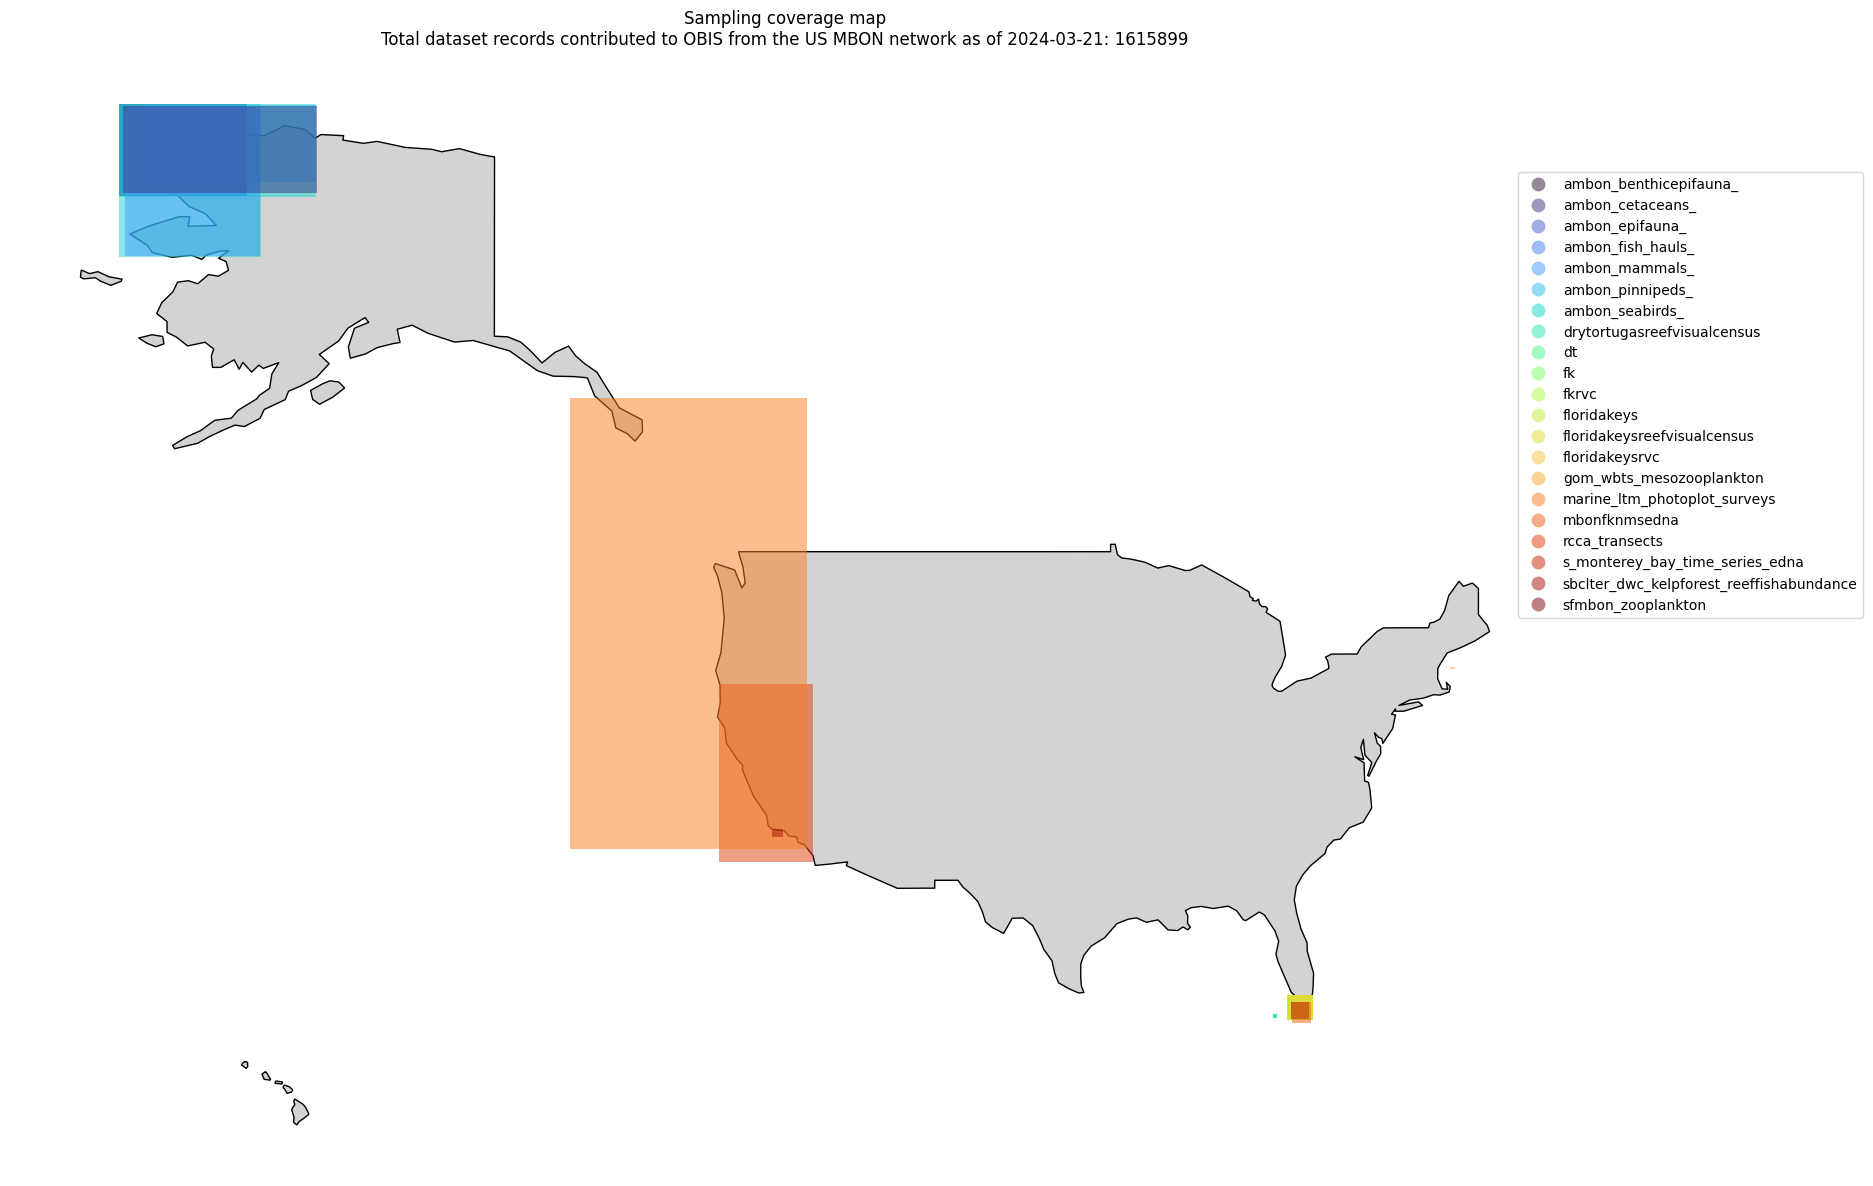

In [ ]:
from datetime import datetime

import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.GeoDataFrame(df_meta)

gdf["geometry"] = geopandas.GeoSeries.from_wkt(gdf["extent"])

gdf.set_crs("epsg:4326", inplace=True)

fig, ax = plt.subplots(
    figsize=(20, 15),
)

gdf.plot(
    ax=ax,
    zorder=10,
    alpha=0.5,
    column="short_name_group",
    legend=True,
    cmap="turbo",
)

leg = ax.get_legend()

leg.set_bbox_to_anchor((0.0, 0.0, 1.2, 0.9))

world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

world = world.to_crs(gdf.crs)

# bound map to US.
world.loc[world["iso_a3"] == "USA"].plot(
    ax=ax, color="lightgrey", edgecolor="black", zorder=1
)

today = datetime.now().strftime("%Y-%m-%d")

ax.set_title(
    f"Sampling coverage map\nTotal dataset records contributed to OBIS from the US MBON network as of {today}: {gdf.records.sum() }"
)

ax.set_axis_off();

In [ ]:
import requests

pk = 1043  # Matt's map
url = f"https://geonode.goosocean.org/api/v2/maps/{1043}/local_layers"

data = requests.get(url).json()


def get_original_data(layer):
    # we can use WFS GeoJSON response when https://github.com/iobis/bioeco-geonode/issues/166 is solved.
    url = f"https://geonode.goosocean.org/download/{layer['pk']}"

    fmat = "json"
    url2 = f"https://geonode.goosocean.org/geoserver/ows?service=WFS&version=1.0.0&request=GetFeature&typename=geonode%3A{layer['name']}&outputFormat={fmat}&srs=EPSG%3A4326&format_options=charset%3AUTF-8"

    try:
        gdf = geopandas.read_file(url)
    except Exception as err:
        print(f"Could not read {url=}.\nGot {err}.\nTrying\n{url2}\n")
        gdf = geopandas.read_file(url2)

    return gdf


layers = {layer["name"]: get_original_data(layer) for layer in data}


Could not read url='https://geonode.goosocean.org/download/1046'.
Got HTTP Error 404: Not Found.
Trying
https://geonode.goosocean.org/geoserver/ows?service=WFS&version=1.0.0&request=GetFeature&typename=geonode%3Acencoos_mbon_edna_y0kf&outputFormat=json&srs=EPSG%3A4326&format_options=charset%3AUTF-8

Could not read url='https://geonode.goosocean.org/download/1047'.
Got HTTP Error 404: Not Found.
Trying
https://geonode.goosocean.org/geoserver/ows?service=WFS&version=1.0.0&request=GetFeature&typename=geonode%3Aarctic_mbon_us&outputFormat=json&srs=EPSG%3A4326&format_options=charset%3AUTF-8



In [ ]:

import folium

# Now make a map with those layers
m = folium.Map(
    tiles=None,
    zoom_start=13,
)

# OBIS - layer per dataset "group" (as defined above - from url)
for name, group in gdf.groupby(by="short_name_group"):
    group["ref"] = [
        f'<a href="{url}" target="_blank">{url}</a>' for url in group["url"]
    ]

    folium.GeoJson(
        data=group,
        name="OBIS: {}".format(name),
        marker=folium.CircleMarker(radius=1, color="green"),
        tooltip=folium.features.GeoJsonTooltip(
            fields=["title"],
            aliases=[""],
        ),
        popup=folium.features.GeoJsonPopup(
            fields=["ref"],
            aliases=[""],
        ),
        show=True,
    ).add_to(m)

# GOOS Bio-Eco layers
for layer in layers.keys():
    name = next(item for item in data if item["name"] == layer)["name"]
    tooltip = next(item for item in data if item["name"] == layer)["title"]
    url = next(item for item in data if item["name"] == layer)["detail_url"]
    # abst    = next(item for item in data if item["name"] == layer)['abstract']
    popup = folium.map.Popup(
        f'<a href="{url}" target="_blank">{url}</a>'
    )  # "<p>{abst}</p>")

    folium.GeoJson(
        data=layers[layer],
        name="BioEco: {}".format(name),
        tooltip=tooltip,
        popup=popup,
        show=True,
    ).add_to(m)

m

In [ ]:
gdf_goos = pd.DataFrame()

for layer in layers:
   gdf_goos = pd.concat([gdf_goos, layers[layer]])

#gdf_goos

,id,fid,geometry,FID,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,OBJECTID,Id,Shape_Leng,Shape_Area
0,cencoos_mbon_edna_y0kf.1,1.0,"POLYGON ((-124.18614 41.12059, -125.27566 41.12764, -125.27660 41.02691, -124.18210 41.03159, -124.18614 41.12059))",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cencoos_mbon_edna_y0kf.2,2.0,"POLYGON ((-123.27167 38.44260, -124.17460 38.44134, -124.07062 37.74393, -123.41251 36.84003, -124.63088 36.07089, -125.94714 35.32045, -125.37207 34.79481, -123.67430 35.72432, -122.96237 36.10817, -122.59249 35.35623, -121.49214 33.76281, -119.43984 32.67767, -119.04794 33.25570, -118.80641 33.79427, -119.59245 34.14513, -120.30433 34.18958, -120.82386 34.46276, -121.06110 35.28122, -121.700...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,arctic_mbon_us.1,1.0,"POLYGON ((-164.06983 66.91277, -163.58155 67.16042, -166.60889 68.30726, -166.12061 68.78939, -163.72803 69.00037, -162.89795 69.70620, -161.82373 70.37288, -161.23780 70.29071, -159.18701 70.92298, -157.28272 70.90701, -156.64795 71.30231, -156.11084 71.30231, -156.98975 71.99404, -159.57764 72.33797, -163.09327 72.50021, -166.31592 72.35278, -168.22022 71.55115, -169.34327 70.30717, -169.733...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,"POLYGON ((-120.67383 34.64225, -120.69031 34.55181, -120.47607 34.41144, -119.84985 34.37518, -119.30603 34.22543, -119.16870 34.07541, -119.31702 33.98892, -119.48730 34.16182, -120.55847 34.26630, -120.89905 34.49298, -120.88257 34.65580, -120.64636 34.64677, -120.67383 34.64225))",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,"POLYGON ((-118.16895 33.71520, -117.88879 33.57801, -118.09204 33.39476, -118.22388 33.47727, -118.16895 33.71520))",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,"POLYGON Z ((-83.01997 27.77199 0.00000, -82.81765 27.97248 0.00000, -82.71019 27.61297 0.00000, -82.49836 27.16925 0.00000, -82.27635 26.82425 0.00000, -82.17244 26.60807 0.00000, -82.12396 26.43379 0.00000, -82.05623 26.44772 0.00000, -81.94715 26.49749 0.00000, -81.77843 25.97413 0.00000, -81.71530 25.82546 0.00000, -81.62886 25.86048 0.00000, -81.51106 25.80247 0.00000, -81.38836 25.70634 0...",NaN,Untitled Polygon,None,None,None,None,None,1.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,"POLYGON ((-70.76224 42.95632, -70.60537 43.13090, -70.38967 43.04888, -70.56080 42.85709, -70.76224 42.95632))",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.947048,0.053067
1,NaN,NaN,"POLYGON ((-70.19549 43.54233, -70.20310 43.63048, -70.16126 43.66900, -70.06334 43.72399, -69.94640 43.68344, -70.03767 43.49476, -70.19549 43.54233))",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.755845,0.037611


<Axes: >

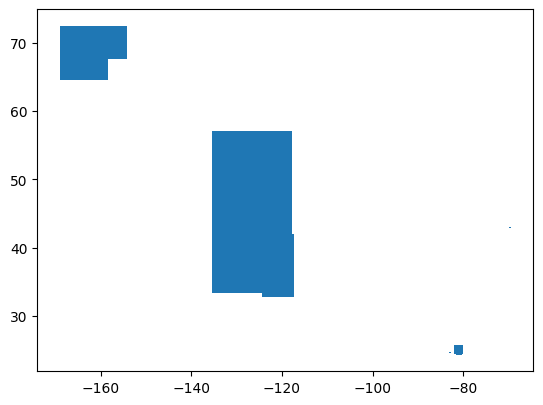

In [ ]:
gdf_all = pd.concat([gdf, gdf_goos])

gdf_all.dropna(subset=['extent'],axis=0).plot()

In [ ]:
gdf_all.dropna(subset=['extent'],axis=0).to_file('mbon_polygons.geojson', driver='GeoJSON')

ValueError: Invalid field type <class 'list'>

In [ ]:
type(gdf_all.dropna(subset=['extent'],axis=0))

geopandas.geodataframe.GeoDataFrame